# Xử lý dữ liệu

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("house_final.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1160 non-null   int64  
 1   ID          1160 non-null   int64  
 2   acreage     1160 non-null   float64
 3   so_PN       1160 non-null   float64
 4   so_WC       1160 non-null   float64
 5   price       1160 non-null   float64
 6   frontage    1160 non-null   int64  
 7   area        1160 non-null   object 
 8   city        1160 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 81.7+ KB


In [3]:
# Gán lại giá trị int cho các dữ liệu object

le = LabelEncoder()
is_Category = df.dtypes == object
category_column_list = df.columns[is_Category].tolist()
df[category_column_list] = df[category_column_list].apply(lambda col: le.fit_transform(col))

# Training Models

## Chia dữ liệu thành các tập train, test

In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

X = df.drop(columns='price')
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
     

## Chuẩn hóa dữ liệu

In [5]:
from sklearn.preprocessing import  StandardScaler

sc=StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Kiểm tra và xử lý giá trị NaN
nan_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = nan_imputer.fit_transform(X)

# Kiểm tra và xử lý giá trị vô cùng
X = np.nan_to_num(X, nan=0, posinf=np.finfo(np.float64).max, neginf=np.finfo(np.float64).min)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [8]:
### Dự đoán bằng cách áp model Linear Regression
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

#### MSE

In [10]:
lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
print('LR MSE (Train): ', lr_train_mse)
print('LR MSE (Test): ', lr_test_mse)

LR MSE (Train):  1.7797093075450604e+18
LR MSE (Test):  9.422914326976543e+17


#### RMSE

In [11]:
#rms = sqrt(mean_squared_error(y_actual, y_predicted))
lr_train_rmse = sqrt(mean_squared_error(y_train, y_lr_train_pred))
lr_test_rmse = sqrt(mean_squared_error(y_test, y_lr_test_pred))
print('LR RMSE (Train): ', lr_train_rmse)
print('LR RMSE (Test): ', lr_test_rmse)

LR RMSE (Train):  1334057460.361082
LR RMSE (Test):  970716968.3783499


#### MAE

In [18]:
lr_train_mae = mean_absolute_error(y_train, y_lr_train_pred)
lr_test_mae = mean_absolute_error(y_test, y_lr_test_pred)
print('LR MAE (Train): ', lr_train_mae)
print('LR MAE (Test): ', lr_test_mae)

LR MAE (Train):  358821573.1191792
LR MAE (Test):  361225573.4932723


#### R2S

In [19]:
lr_train_r2s = r2_score(y_train, y_lr_train_pred)
lr_test_r2s = r2_score(y_test, y_lr_test_pred)
print('LR R2S (Train): ', lr_train_r2s)
print('LR R2S (Test): ', lr_test_r2s)

LR R2S (Train):  0.045061818317309155
LR R2S (Test):  -0.07151238569784346


Text(0.5, 0, 'thực tế')

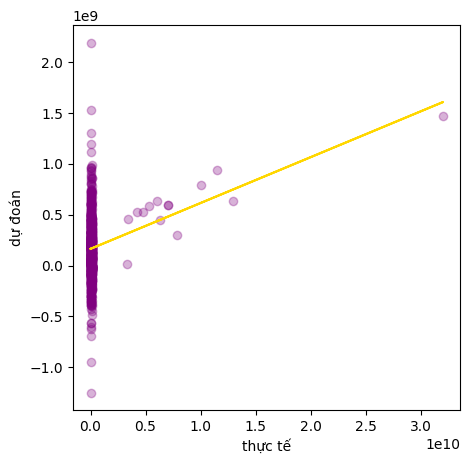

In [20]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, c="purple" ,alpha=0.3)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), 'gold')
plt.ylabel('dự đoán')
plt.xlabel('thực tế')

## Ridge Regression

In [21]:
from sklearn.linear_model import Ridge
rr = Ridge()
rr.fit(X_train, y_train)

Ridge()

In [22]:
### Dự đoán bằng cách áp model Ridge Regression
y_rr_train_pred = rr.predict(X_train)
y_rr_test_pred = rr.predict(X_test)

#### MSE

In [23]:
rr_train_mse = mean_squared_error(y_train, y_rr_train_pred)
rr_test_mse = mean_squared_error(y_test, y_rr_test_pred)
print('RR MSE (Train): ', rr_train_mse)
print('RR MSE (Test): ', rr_test_mse)

RR MSE (Train):  1.780186302454173e+18
RR MSE (Test):  9.378860960459638e+17


#### RMSE

In [24]:
rr_train_rmse = sqrt(mean_squared_error(y_train, y_rr_train_pred))
rr_test_rmse = sqrt(mean_squared_error(y_test, y_rr_test_pred))
print('RR RMSE (Train): ', rr_train_rmse)
print('RR RMSE (Test): ', rr_test_rmse)

RR RMSE (Train):  1334236224.382389
RR RMSE (Test):  968445195.1690214


#### MAE

In [25]:
rr_train_mae = mean_absolute_error(y_train, y_rr_train_pred)
rr_test_mae = mean_absolute_error(y_test, y_rr_test_pred)
print('RR MAE (Train): ', rr_train_mae)
print('RR MAE (Test): ', rr_test_mae)

RR MAE (Train):  355418953.3822769
RR MAE (Test):  356624552.0959633


#### R2S

In [26]:
rr_train_r2s = r2_score(y_train, y_rr_train_pred)
rr_test_r2s = r2_score(y_test, y_rr_test_pred)
print('RR R2S (Train): ', rr_train_r2s)
print('RR R2S (Test): ', rr_test_r2s)

RR R2S (Train):  0.04480587727724794
RR R2S (Test):  -0.06650292405820912


## Lasso Regression

In [27]:
from sklearn.linear_model import Lasso

ls = Lasso(alpha=1.0)
ls.fit(X_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.258e+20, tolerance: 1.730e+17
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [28]:
### Dự đoán bằng cách áp model Lasso Regression
y_ls_train_pred = ls.predict(X_train)
y_ls_test_pred = ls.predict(X_test)

#### MSE

In [29]:
ls_train_mse = mean_squared_error(y_train, y_ls_train_pred)
ls_test_mse = mean_squared_error(y_test, y_ls_test_pred)
print('LS MSE (Train): ', ls_train_mse)
print('LS MSE (Test): ', ls_test_mse)

LS MSE (Train):  1.7797106193388726e+18
LS MSE (Test):  9.420627695498789e+17


#### RMSE

In [30]:
ls_train_rmse = sqrt(mean_squared_error(y_train, y_ls_train_pred))
ls_test_rmse = sqrt(mean_squared_error(y_test, y_ls_test_pred))
print('LS RMSE (Train): ', ls_train_rmse)
print('LS RMSE (Test): ', ls_test_rmse)

LS RMSE (Train):  1334057952.0166552
LS RMSE (Test):  970599180.6867956


#### MAE

In [31]:
ls_train_mae = mean_absolute_error(y_train, y_ls_train_pred)
ls_test_mae = mean_absolute_error(y_test, y_ls_test_pred)
print('LS MAE (Train): ', ls_train_mae)
print('LS MAE (Test): ', ls_test_mae)

LS MAE (Train):  358625746.06477857
LS MAE (Test):  361001308.1457367


#### R2S

In [32]:
ls_train_r2s = r2_score(y_train, y_ls_train_pred)
ls_test_r2s = r2_score(y_test, y_ls_test_pred)
print('LS R2S (Train): ', ls_train_r2s)
print('LS R2S (Test): ', ls_test_r2s)

LS R2S (Train):  0.04506111444842875
LS R2S (Test):  -0.07125236487361453


## Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000, max_depth=10).fit(X_train, y_train)

In [52]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

#### MSE

In [53]:
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
print('RF MSE (Train): ', rf_train_mse)
print('RF MSE (Test): ', rf_test_mse)

RF MSE (Train):  2.4930508518978723e+17
RF MSE (Test):  6.342095643134739e+17


#### RMSE

In [54]:
rf_train_rmse = sqrt(mean_squared_error(y_train, y_rf_train_pred))
rf_test_rmse = sqrt(mean_squared_error(y_test, y_rf_test_pred))
print('RF RMSE (Train): ', rf_train_rmse)
print('RF RMSE (Test): ', rf_test_rmse)

RF RMSE (Train):  499304601.6108676
RF RMSE (Test):  796372754.6278024


#### MAE

In [37]:
rf_train_mae = mean_absolute_error(y_train, y_rf_train_pred)
rf_test_mae = mean_absolute_error(y_test, y_rf_test_pred)
print('RF MAE (Train): ', rf_train_mae)
print('RF MAE (Test): ', rf_test_mae)

RF MAE (Train):  139571432.48448148
RF MAE (Test):  241020774.0123479


#### R2S

In [38]:
rf_train_r2s = r2_score(y_train, y_rf_train_pred)
rf_test_r2s = r2_score(y_test, y_rf_test_pred)
print('RF R2S (Train): ', rf_train_r2s)
print('RF R2S (Test): ', rf_test_r2s)

RF R2S (Train):  0.8101126499713645
RF R2S (Test):  0.259765896065426


Text(0.5, 0, 'thực tế')

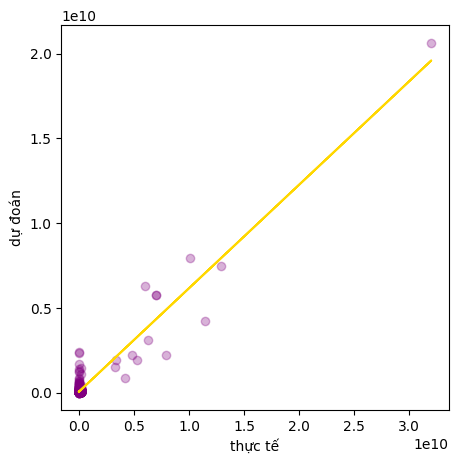

In [47]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_rf_train_pred, c="purple" ,alpha=0.3)

z = np.polyfit(y_train, y_rf_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), 'gold')
plt.ylabel('dự đoán')
plt.xlabel('thực tế')

## Gradient Boost

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [40]:
y_gb_train_pred = rf.predict(X_train)
y_gb_test_pred = rf.predict(X_test)

#### MSE

In [41]:
gb_train_mse = mean_squared_error(y_train, y_gb_train_pred)
gb_test_mse = mean_squared_error(y_test, y_gb_test_pred)
print('GB MSE (Train): ', gb_train_mse)
print('GB MSE (Test): ', gb_test_mse)

GB MSE (Train):  3.5389126826570054e+17
GB MSE (Test):  6.509642479530487e+17


#### RMSE

In [42]:
gb_train_rmse = sqrt(mean_squared_error(y_train, y_gb_train_pred))
gb_test_rmse = sqrt(mean_squared_error(y_test, y_gb_test_pred))
print('GB RMSE (Train): ', gb_train_rmse)
print('GB RMSE (Test): ', gb_test_rmse)

GB RMSE (Train):  594887609.7765868
GB RMSE (Test):  806823554.4114021


#### MAE

In [43]:
gb_train_mae = mean_absolute_error(y_train, y_gb_train_pred)
gb_test_mae = mean_absolute_error(y_test, y_gb_test_pred)
print('GB MAE (Train): ', gb_train_mae)
print('GB MAE (Test): ', gb_test_mae)

GB MAE (Train):  139571432.48448148
GB MAE (Test):  241020774.01234788


#### R2S

In [44]:
gb_train_r2s = r2_score(y_train, y_gb_train_pred)
gb_test_r2s = r2_score(y_test, y_gb_test_pred)
print('GB R2S (Train): ', gb_train_r2s)
print('GB R2S (Test): ', gb_test_r2s)

GB R2S (Train):  0.8101126499713645
GB R2S (Test):  0.2597658960654263


Text(0.5, 0, 'thực tế')

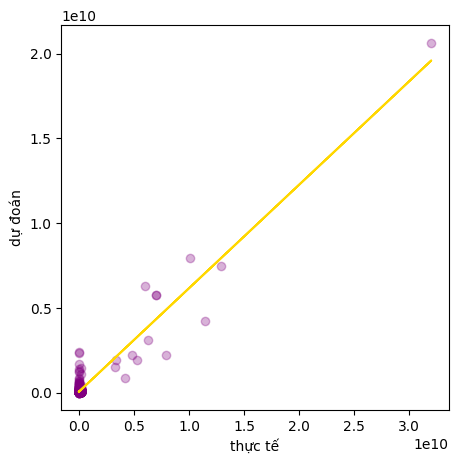

In [45]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_gb_train_pred, c="purple" ,alpha=0.3)

z = np.polyfit(y_train, y_gb_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), 'gold')
plt.ylabel('dự đoán')
plt.xlabel('thực tế')

In [46]:
print("LinearRegression")

print(">> Train R2-score: ", lr_train_r2s)
print(">> Test R2-score: ", lr_test_r2s)

print("RidgeRegression")

print(">> Train R2-score: ", rr_train_r2s)
print(">> Test R2-score: ", rr_test_r2s)

print("LassoRegression")

print(">> Train R2-score: ", ls_train_r2s)
print(">> Test R2-score: ", ls_test_r2s)

print("RandomForest")

print(">> Train R2-score: ", rf_train_r2s)
print(">> Test R2-score: ", rf_test_r2s)

print("GradientBoost")

print(">> Train R2-score: ", gb_train_r2s)
print(">> Test R2-score: ", gb_test_r2s)


LinearRegression
>> Train R2-score:  0.045061818317309155
>> Test R2-score:  -0.07151238569784346
RidgeRegression
>> Train R2-score:  0.04480587727724794
>> Test R2-score:  -0.06650292405820912
LassoRegression
>> Train R2-score:  0.04506111444842875
>> Test R2-score:  -0.07125236487361453
RandomForest
>> Train R2-score:  0.8101126499713645
>> Test R2-score:  0.259765896065426
GradientBoost
>> Train R2-score:  0.8101126499713645
>> Test R2-score:  0.2597658960654263


##### Nhóm em chọn đánh giá hiệu quả của các mô hình dựa trên R2-score (hệ số xác định R2) vì R2-score đo lường mức độ phù hợp giữa dữ liệu thực tế và dự đoán của mô hình. Giá trị R2-score nằm trong khoảng từ 0 đến 1, với giá trị 1 cho thấy mô hình hoàn toàn phù hợp với dữ liệu thực tế. Trong 5 models trên, cả Random Forest và Gradient Boost đều có hệ số R2-score ngang nhau. Tuy nhiên, em thiên về Gradient Boost hơn vì đây là model có khả năng thích nghi và học hỏi sai lầm tốt hơn.